In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy import ndimage

In [40]:
windowSize=3

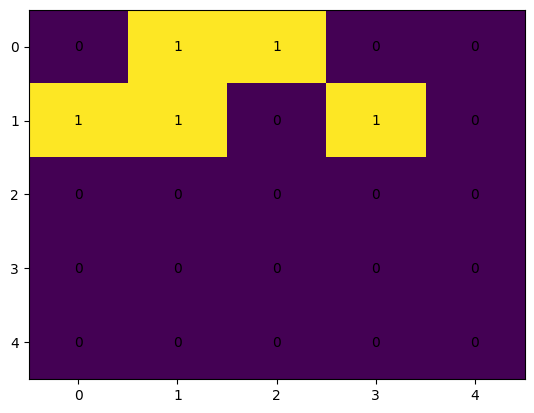

In [55]:
size = 5
rasterimg = np.random.randint(2, size=(size, size))
#rasterimg = np.random.randint(5, size=(5, 5))

rasterimg[2:5,]=0

rasterimg

fig1, (ax1)= plt.subplots(1, sharex = True, sharey = False)
ax1.imshow(rasterimg, interpolation ='none', aspect = 'auto')
for (j,i),label in np.ndenumerate(rasterimg):
    ax1.text(i,j,label,ha='center',va='center')
plt.show() 

In [56]:
from scipy import ndimage
import numpy as np
def computerNeighbour(rasterimg,windowSize,nearerToLowest=True,maxinteration=9):
    window= np.ones((windowSize, windowSize))
    def countoperation(x):
        centre = int(x.size / 2)
        atCentre=x[centre]
        if (atCentre==0):
            x[centre]=-np.inf
            if ((x).max()==0):
                return 0
            else:
                x[centre]=np.inf
                return (x).min()+1
        else:
            return atCentre+1
    itr=0
    while(0 in rasterimg and itr<maxinteration):
        res = ndimage.generic_filter(rasterimg , countoperation, footprint=window,)
        rasterimg=res
        itr=itr+1
    if(nearerToLowest):
        rasterimg=(rasterimg-itr-1)*(-1)
    return rasterimg

In [57]:
rasterimg=computerNeighbour(rasterimg,3)
print(rasterimg)

[[1 0 0 1 1]
 [0 0 1 0 1]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]


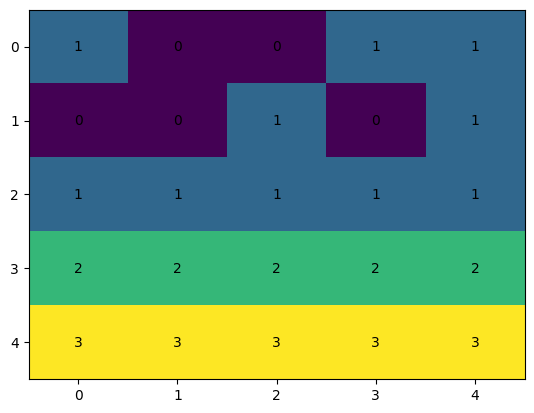

In [58]:
fig1, (ax1)= plt.subplots(1, sharex = True, sharey = False)
ax1.imshow(rasterimg, interpolation ='none', aspect = 'auto')
for (j,i),label in np.ndenumerate(rasterimg):
    ax1.text(i,j,label,ha='center',va='center')
plt.show() 